In [1]:
pip install -r requirements.txt

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        pass
#         print(os.path.join(dirname, filename))

In [3]:
import os, warnings
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
def set_seed(seed):
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
set_seed(42)

In [5]:
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore") # to clean up output cells

In [8]:
!git clone https://github.com/RishitToteja/Chext-X-ray-Images-Data-Set.git

Cloning into 'Chext-X-ray-Images-Data-Set'...
Updating files:   5% (128/2296)
Updating files:   6% (138/2296)
Updating files:   6% (142/2296)
Updating files:   7% (161/2296)
Updating files:   8% (184/2296)
Updating files:   9% (207/2296)
Updating files:  10% (230/2296)
Updating files:  10% (241/2296)
Updating files:  11% (253/2296)
Updating files:  12% (276/2296)
Updating files:  13% (299/2296)
Updating files:  14% (322/2296)
Updating files:  15% (345/2296)
Updating files:  15% (358/2296)
Updating files:  16% (368/2296)
Updating files:  17% (391/2296)
Updating files:  18% (414/2296)
Updating files:  19% (437/2296)
Updating files:  20% (460/2296)
Updating files:  21% (483/2296)
Updating files:  22% (506/2296)
Updating files:  23% (529/2296)
Updating files:  24% (552/2296)
Updating files:  25% (574/2296)
Updating files:  26% (597/2296)
Updating files:  27% (620/2296)
Updating files:  27% (635/2296)
Updating files:  28% (643/2296)
Updating files:  29% (666/2296)
Updating files:  30% (689/

In [ ]:
data_path = 'C:\\Users\\Vinit\\OneDrive\\Desktop\\HealthCare\\healthcare_management_system\\Demo\\Chext-X-ray-Images-Data-Set\\DataSet\\Data'
train_dir = 'C:\\Users\\Vinit\\OneDrive\\Desktop\\HealthCare\\healthcare_management_system\\Demo\\Chext-X-ray-Images-Data-Set\\DataSet\\Data\\train'
test_dir = 'C:\\Users\\Vinit\\OneDrive\\Desktop\\HealthCare\\healthcare_management_system\\Demo\\Chext-X-ray-Images-Data-Set\\DataSet\\Data\\test'
os.listdir(train_dir)
os.listdir(test_dir)

In [18]:
image_size=(224,224)
batch_size=32

In [19]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=5, verbose=1,min_delta=0.0001)

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,  # Random rotation between -20 and 20 degrees
    width_shift_range=0.1,  # Random shift in the width direction
    height_shift_range=0.1,  # Random shift in the height direction
    shear_range=0.1,  # Random shear within a range of 0.1 radians
    zoom_range=0.1,  # Random zoom between 0.9 and 1.1
    horizontal_flip=True,  # Random horizontal flipping
    fill_mode='nearest'  # Fill any empty pixels with the nearest pixel value
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,  # Random rotation between -20 and 20 degrees
    width_shift_range=0.1,  # Random shift in the width direction
    height_shift_range=0.1,  # Random shift in the height direction
    shear_range=0.1,  # Random shear within a range of 0.1 radians
    zoom_range=0.1,  # Random zoom between 0.9 and 1.1
    horizontal_flip=True,  # Random horizontal flipping
    fill_mode='nearest'  # Fill any empty pixels with the nearest pixel value
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator=test_datagen.flow_from_directory(test_dir)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=128,
    class_mode='categorical',
    subset='training',  # Specify the subset as 'training' for train data
    shuffle=True,  # Shuffle the data
    seed=42)  # Set a random seed for reproducibility

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=128,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
    seed=42)

Found 1288 images belonging to 3 classes.
Found 4116 images belonging to 3 classes.
Found 1028 images belonging to 3 classes.


In [21]:
from tensorflow import keras
from keras import preprocessing
# Define the base model for transfer learning
base_model = keras.applications.ResNet50V2(
    include_top=False,
    weights='imagenet',
    input_shape=(128, 128, 3)
)

# Freeze the weights of the base model so that they are not updated during training
for layer in base_model.layers:
    layer.trainable = False

# Create a new model by adding a classification head on top of the base model
model = keras.models.Sequential()
model.add(base_model)
model.add(keras.layers.GlobalAveragePooling2D())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(3, activation='softmax'))

# Compile the model with the Adam optimizer and categorical cross-entropy loss function
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 4, 4, 2048)        23564800  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 256)               524544    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 3)                 771       
                                                                 
Total params: 24,090,115
Trainable params: 525,315
Non-trainable params: 23,564,800
____________________________________

In [23]:
history=model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=1,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[es]
)

33/33 [==============================] - 269s 8s/step - loss: 0.5312 - accuracy: 0.8052 - val_loss: 0.2688 - val_accuracy: 0.9086


In [24]:
print("training_accuracy", history.history['accuracy'][-1])
print("validation_accuracy", history.history['val_accuracy'][-1])

training_accuracy 0.8051506280899048
validation_accuracy 0.9085603356361389


<AxesSubplot:>

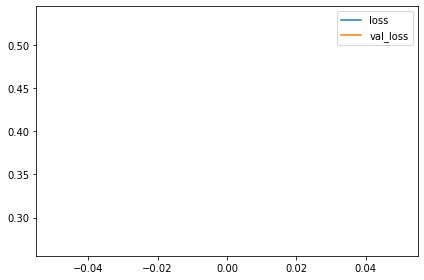

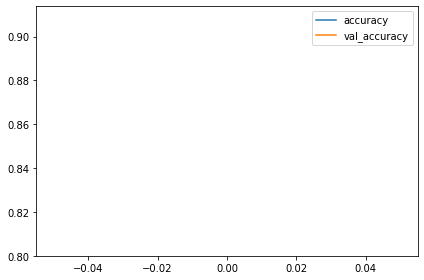

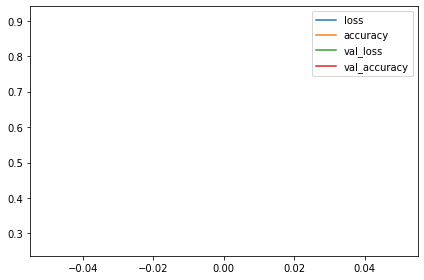

In [26]:
model.save('covid_model.h5')

41/41 [==============================] - 89s 2s/step


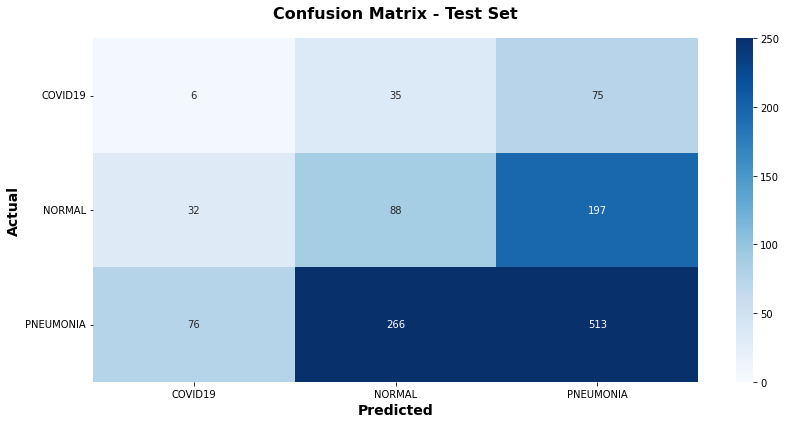

In [27]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


classes = ["COVID19", "NORMAL", "PNEUMONIA"]

y_pred = model.predict(test_generator)
predictions = np.array(list(map(lambda x: np.argmax(x), y_pred)))

y_true=test_generator.classes

CMatrix = pd.DataFrame(confusion_matrix(y_true, predictions), columns=classes, index =classes)

plt.figure(figsize=(12, 6))
ax = sns.heatmap(CMatrix, annot = True, fmt = 'g' ,vmin = 0, vmax = 250,cmap = 'Blues')
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax.set_ylabel('Actual',fontsize = 14,weight = 'bold') 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20);


In [28]:
print(classification_report(y_true, predictions))

              precision    recall  f1-score   support

           0       0.05      0.05      0.05       116
           1       0.23      0.28      0.25       317
           2       0.65      0.60      0.63       855

    accuracy                           0.47      1288
   macro avg       0.31      0.31      0.31      1288
weighted avg       0.49      0.47      0.48      1288



In [29]:
filenames=test_generator.filenames
predicted_classes = np.argmax(y_pred, axis=1)
class_names = test_generator.class_indices
class_names = {v: k for k, v in class_names.items()}
predicted_class_names = [class_names[k] for k in predicted_classes]

# Create a dataframe to store the results
results_df = pd.DataFrame({'filename': filenames, 'predicted_class': predicted_class_names})

# Add a column for the actual class
results_df['actual_class'] = results_df['filename'].apply(lambda x: os.path.dirname(x))

# Add a column for the image name
results_df['image_name'] = results_df['filename'].apply(lambda x: os.path.basename(x))

# Add a column for the image source folder name
results_df['folder_name'] = results_df['filename'].apply(lambda x: os.path.basename(os.path.dirname(x)))

# Reorder the columns
results_df = results_df[['image_name', 'folder_name', 'actual_class', 'predicted_class']]

# Save the results to a CSV file
results_df.to_csv('results.csv', index=False)